In [71]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
confusion_matrix,
classification_report,
accuracy_score,
precision_score,
recall_score,
f1_score,
roc_curve,
roc_auc_score
)

# Wczytanie zbioru Titanic
df = sns.load_dataset('titanic')

print(df.shape)
print(df.head())

(891, 15)
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


# Zadanie 1.1
Wyświetl podstawowe statystyki zbioru (`describe()`, `info()`).

In [38]:
print(df.describe())
df.info()

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891

# Zadanie 1.2
Sprawdź, ile jest brakujących wartości w każdej kolumnie.

In [39]:
print(df.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


# Zadanie 1.3
Oblicz proporcję osób, które przeżyły (ogółem oraz w podziale na płeć i klasę).

In [40]:
print(f"Ogółem przeżyło: {df['survived'].mean():.1%}")
print(f"\nWedług płci:")
print(df.groupby('sex')['survived'].mean())

Ogółem przeżyło: 38.4%

Według płci:
sex
female    0.742038
male      0.188908
Name: survived, dtype: float64


# Zadanie 1.4
Stwórz wykres pokazujący przeżywalność w zależności od płci i klasy.

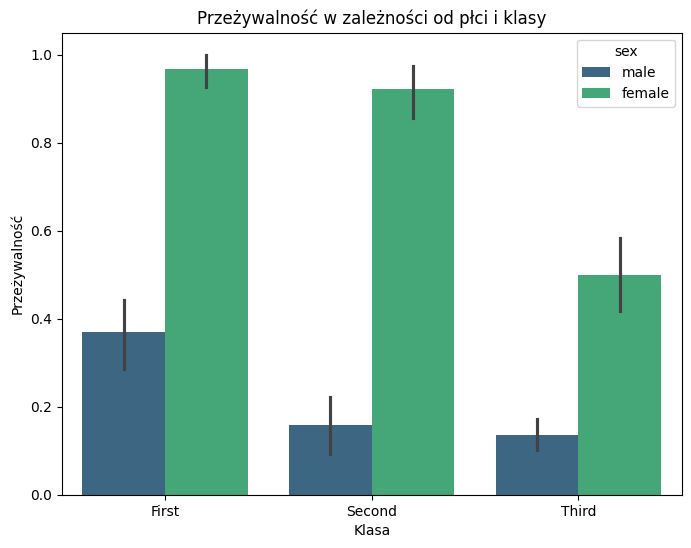

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(x='class', y='survived', hue='sex', data=df, palette='viridis')
plt.title('Przeżywalność w zależności od płci i klasy')
plt.xlabel('Klasa')
plt.ylabel('Przeżywalność')
plt.show()

# Zadanie 2.1
Usuń kolumny, które nie będą przydatne w modelowaniu (np. `deck` – za dużo braków).

In [42]:
cols = ['survived','pclass','sex','age','sibsp','parch','fare','alone']
df = df[cols].copy()
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare  alone
0         0       3    male  22.0      1      0   7.2500  False
1         1       1  female  38.0      1      0  71.2833  False
2         1       3  female  26.0      0      0   7.9250   True
3         1       1  female  35.0      1      0  53.1000  False
4         0       3    male  35.0      0      0   8.0500   True


# Zadanie 2.2
Uzupełnij brakujące wartości w kolumnie `age` (np. medianą).

In [43]:
df['age'] = df['age'].fillna(df['age'].median())
print(df.head())

   survived  pclass     sex   age  sibsp  parch     fare  alone
0         0       3    male  22.0      1      0   7.2500  False
1         1       1  female  38.0      1      0  71.2833  False
2         1       3  female  26.0      0      0   7.9250   True
3         1       1  female  35.0      1      0  53.1000  False
4         0       3    male  35.0      0      0   8.0500   True


# Zadanie 2.3
Przekształć zmienne kategoryczne na numeryczne (one-hot encoding).

In [44]:
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
print(df.head())

   survived  pclass   age  sibsp  parch     fare  alone  sex_male
0         0       3  22.0      1      0   7.2500  False      True
1         1       1  38.0      1      0  71.2833  False     False
2         1       3  26.0      0      0   7.9250   True     False
3         1       1  35.0      1      0  53.1000  False     False
4         0       3  35.0      0      0   8.0500   True      True


# Zadanie 2.4
Podziel dane na zbiór treningowy (80%) i testowy (20%) z zachowaniem proporcji klas
(`stratify`).

In [ ]:
X = df.drop('survived', axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (712, 7)
y_train shape: (712,)
X_test shape: (179, 7)
y_test shape: (179,)


# Zadanie 3.1
Wytrenuj model regresji logistycznej na zbiorze treningowym.

In [45]:
model = LogisticRegression(random_state=42, solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(random_state=42, solver='liblinear')

# Zadanie 3.2
Wyświetl współczynniki modelu i zinterpretuj 3 najważniejsze zmienne.

In [46]:
coefficients = model.coef_[0]
feature_names = X_train.columns
coeff_df = pd.DataFrame({'Zmienna': feature_names, 'Współczynnik': coefficients})
coeff_df = coeff_df.sort_values(by='Współczynnik', ascending=True)
print("Współczynniki modelu")
print(coeff_df)

Współczynniki modelu
    Zmienna  Współczynnik
6  sex_male     -2.389906
0    pclass     -0.742126
5     alone     -0.454490
2     sibsp     -0.348067
3     parch     -0.190175
1       age     -0.025794
4      fare      0.005686


Największy wpływ na przeżywalność miała płeć, klasa oraz to czy pasażer podróżował sam

# Zadanie 3.3
Oblicz odds ratio dla każdej zmiennej i wyjaśnij, co oznacza dla zmiennej `sex`.

In [47]:
for feature, coefficient in zip(feature_names, coefficients) :
  odds_ratio = np.exp(coefficient)
  print(f"{feature}: beta={coefficient:.3f}, odds ratio={odds_ratio:.3f}")

pclass: beta=-0.742, odds ratio=0.476
age: beta=-0.026, odds ratio=0.975
sibsp: beta=-0.348, odds ratio=0.706
parch: beta=-0.190, odds ratio=0.827
fare: beta=0.006, odds ratio=1.006
alone: beta=-0.454, odds ratio=0.635
sex_male: beta=-2.390, odds ratio=0.092


Niskie odds ratio dla zmiennej sex_male oznacza, że przeżywalność mężczyzn jest dużo mniejsza niż kobiet przy zachowaniu innych parametrów z takimi samymi wartościami

# Zadanie 4.1
Dokonaj predykcji na zbiorze testowym.

In [48]:
y_pred = model.predict(X_test)
X_test_copy = X_test.copy()
X_test_copy['predicted_survived'] = y_pred
print(X_test_copy.head())

     pclass   age  sibsp  parch     fare  alone  sex_male  predicted_survived
565       3  24.0      2      0  24.1500  False      True                   0
160       3  44.0      0      1  16.1000  False      True                   0
553       3  22.0      0      0   7.2250   True      True                   0
860       3  41.0      2      0  14.1083  False      True                   0
241       3  28.0      1      0  15.5000  False     False                   1


# Zadanie 4.2
Wyświetl i zwizualizuj **macierz konfuzji**.

Macierz konfuzji:
[[98 12]
 [21 48]]


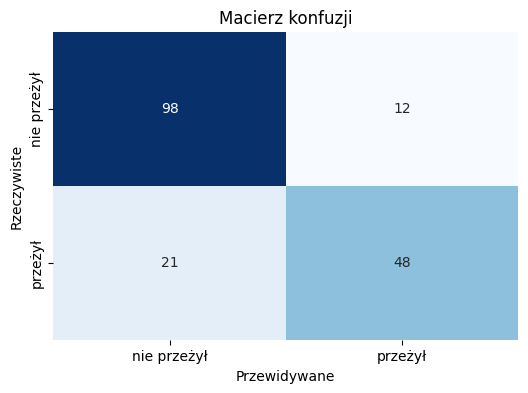

In [49]:
cm = confusion_matrix(y_test, y_pred)
print("Macierz konfuzji:")
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['nie przeżył', 'przeżył'],
            yticklabels=['nie przeżył', 'przeżył'])
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()

# Zadanie 4.3
Oblicz następujące metryki i wyjaśnij, co każda z nich oznacza:
* Accuracy (dokładność)
* Precision (precyzja)
* Recall (czułość)
* F1-score
* Specificity (swoistość)

In [50]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (dokładność): {accuracy:.4f}")
precision = precision_score(y_test, y_pred)
print(f"Precision (precyzja): {precision:.4f}")
recall = recall_score(y_test, y_pred)
print(f"Recall (czułość): {recall:.4f}")
f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
specificity = TN / (TN + FP)
print(f"Specificity (swoistość): {specificity:.4f}")

Accuracy (dokładność): 0.8156
Precision (precyzja): 0.8000
Recall (czułość): 0.6957
F1-score: 0.7442
Specificity (swoistość): 0.8909


Accuracy (dokładność) - dsetek poprawnych predykcji

Precision (precyzja) - odsetek przypadków przewidzianych jako pozytywne które są rzeczywiście pozytywne

Recall (czułość) - odsetek rzeczywistych przypadków pozytywnych które model wykrył prawidłowo

F1-score - średnia harmoniczna precyzji i czułości, im większa tym lepiej

Specificity (swoistość) - odsetek rzeczywistych przypadków negatywnych które zostały prawidłowo sklasyfikowane


# Zadanie 4.4
Narysuj **krzywą ROC** i oblicz **AUC**.

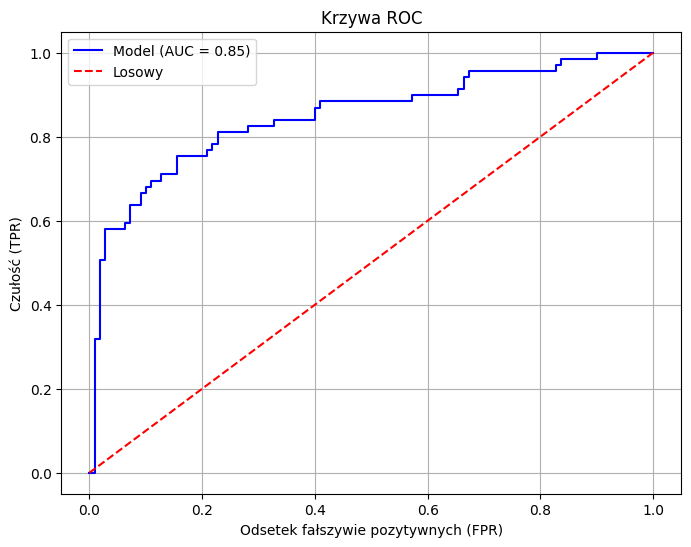

In [51]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc_score = roc_auc_score(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Model (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Losowy')
plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
plt.ylabel('Czułość (TPR)')
plt.title('Krzywa ROC')
plt.legend()
plt.grid(True)
plt.show()

# Zadanie 4.5
Odpowiedz: Która metryka jest najważniejsza w tym problemie i dlaczego?


Najważniejszą metryką w tym problemie jest czułość (recall), ponieważ mówi nam ona o tym jaki odsetek osób które naprawdę przeżyły katastrofę Titanica nasz model zaklasyfikował jako przeżyłe. Wysoka czułość oznacza małą liczbe fałszywych negatywów (FN) - przewidywań modelu, że osoba która w rzeczywistości przeżyła katastrofę jej nie przeżyje. Żeby zidentyfikować czynniki które wpływają na przeżycie powinniśmy dążyć do zidentyfikowania jak największej liczby ocalałych.

# Zadanie 5.1
Sprawdź, jak zmienia się Recall i Precision dla różnych progów klasyfikacji (0.3, 0.4, 0.5,
0.6, 0.7).

In [52]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]

print("Recall and Precision dla różnych progów:")
for threshold in thresholds:
    y_pred_threshold = (y_pred_proba >= threshold).astype(int)
    recall = recall_score(y_test, y_pred_threshold)
    precision = precision_score(y_test, y_pred_threshold)
    print(f"Próg {threshold:.1f}: Recall={recall:.2f}, Precision={precision:.2f}")

Recall and Precision dla różnych progów:
Próg 0.3: Recall=0.81, Precision=0.67
Próg 0.4: Recall=0.75, Precision=0.74
Próg 0.5: Recall=0.70, Precision=0.80
Próg 0.6: Recall=0.58, Precision=0.85
Próg 0.7: Recall=0.42, Precision=0.94


# Zadanie 5.2
Wytrenuj model z `class_weight=’balanced’` i porównaj wyniki z modelem bazowym.

Współczynniki modelu
    Zmienna  Współczynniki modelu bazowego  \
6  sex_male                      -2.389906   
0    pclass                      -0.742126   
5     alone                      -0.454490   
2     sibsp                      -0.348067   
3     parch                      -0.190175   
1       age                      -0.025794   
4      fare                       0.005686   

   Współczynniki modelu zbalansowanego  
6                            -2.327890  
0                            -0.678672  
5                            -0.467016  
2                            -0.353907  
3                            -0.193535  
1                            -0.026003  
4                             0.006685  
Zmienna: Model bazowy | Model zbalansowany
pclass: beta=-0.742, odds ratio=0.476 | beta=-0.679, odds ratio=0.507
age: beta=-0.026, odds ratio=0.975 | beta=-0.026, odds ratio=0.974
sibsp: beta=-0.348, odds ratio=0.706 | beta=-0.354, odds ratio=0.702
parch: beta=-0.190, odds ratio=0.

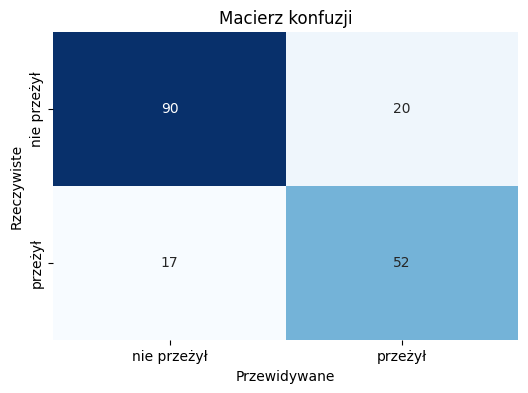

Metryka: Model bazowy | Model zbalansowany
Accuracy (dokładność): 0.8156 | 0.7933
Precision (precyzja): 0.9355 | 0.7222
Recall (czułość): 0.4203 | 0.7536
F1-score: 0.7442 | 0.7376
Specificity (swoistość): 0.8909 | 0.8182


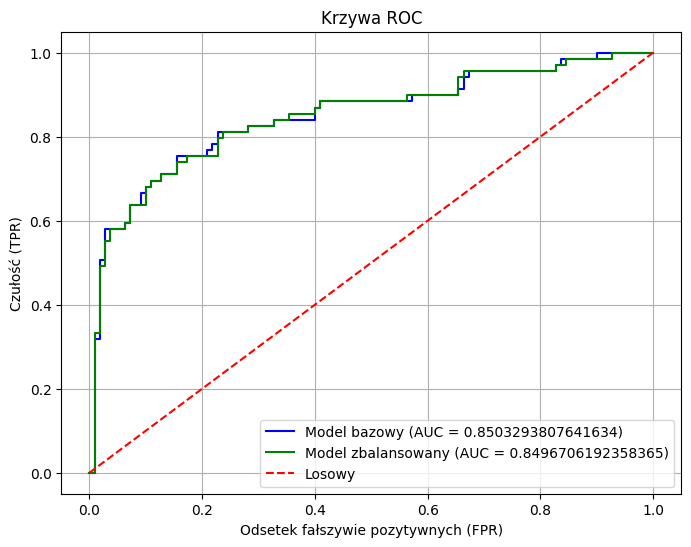

In [60]:
balanced_model = LogisticRegression(random_state=42, solver='liblinear', class_weight='balanced')
balanced_model.fit(X_train, y_train)
balanced_model_coefficients = balanced_model.coef_[0]
feature_names = X_train.columns
coeff_df = pd.DataFrame({'Zmienna': feature_names,
                         'Współczynniki modelu bazowego': coefficients,
                         'Współczynniki modelu zbalansowanego': balanced_model_coefficients})
coeff_df = coeff_df.sort_values(by='Współczynniki modelu bazowego', ascending=True)
print("Współczynniki modelu")
print(coeff_df)
print("Zmienna: Model bazowy | Model zbalansowany")
for feature, coefficient, balanced_model_coefficient in zip(feature_names, coefficients, balanced_model_coefficients) :
  odds_ratio = np.exp(coefficient)
  balanced_model_oddss_ratio = np.exp(balanced_model_coefficient)
  print(f"{feature}: beta={coefficient:.3f}, odds ratio={odds_ratio:.3f} | beta={balanced_model_coefficient:.3f}, odds ratio={balanced_model_oddss_ratio:.3f}")
y_pred = balanced_model.predict(X_test)
X_test_copy = X_test.copy()
X_test_copy['predicted_survived'] = y_pred
print(X_test_copy.head())
cm = confusion_matrix(y_test, y_pred)
print("Macierz konfuzji:")
print(cm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['nie przeżył', 'przeżył'],
            yticklabels=['nie przeżył', 'przeżył'])
plt.title('Macierz konfuzji')
plt.xlabel('Przewidywane')
plt.ylabel('Rzeczywiste')
plt.show()
print("Metryka: Model bazowy | Model zbalansowany")
balanced_model_accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (dokładność): {accuracy:.4f} | {balanced_model_accuracy:.4f}")
balanced_model_precision = precision_score(y_test, y_pred)
print(f"Precision (precyzja): {precision:.4f} | {balanced_model_precision:.4f}")
balanced_model_recall = recall_score(y_test, y_pred)
print(f"Recall (czułość): {recall:.4f} | {balanced_model_recall:.4f}")
balanced_model_f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f} | {balanced_model_f1:.4f}")
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]
TP = cm[1, 1]
balanced_model_specificity = TN / (TN + FP)
print(f"Specificity (swoistość): {specificity:.4f} | {balanced_model_specificity:.4f}")
balanced_model_y_pred_proba = balanced_model.predict_proba(X_test)[:, 1]
balanced_model_fpr, balanced_model_tpr, balanced_model_thresholds = roc_curve(y_test, balanced_model_y_pred_proba)
balanced_model_auc_score = roc_auc_score(y_test, balanced_model_y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Model bazowy (AUC = {auc_score})')
plt.plot(balanced_model_fpr, balanced_model_tpr, color='green', label=f'Model zbalansowany (AUC = {balanced_model_auc_score})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Losowy')
plt.xlabel('Odsetek fałszywie pozytywnych (FPR)')
plt.ylabel('Czułość (TPR)')
plt.title('Krzywa ROC')
plt.legend()
plt.grid(True)
plt.show()

Ważenie klas (`class_weight='balanced'`) miało niewielki, ale zauważalny wpływ na współczynniki regresji, szczególnie dla zmiennych `pclass` i `sex_male`. Zmiany te są zgodne z oczekiwaniami dla danych niezbalansowanych, gdzie model próbuje zmniejszyć błąd na klasie mniejszościowej (w tym przypadku 'survived'), co często prowadzi do **nieznacznego zmniejszenia wpływu dominujących predyktorów** (jak płeć czy klasa, które silnie korelują z przeżyciem, ale mogą być stronnicze w niezbalansowanym zbiorze danych) lub **nieznacznego zwiększenia wpływu predyktorów, które mogą być bardziej istotne dla klasy mniejszościowej**.
Użycie `class_weight='balanced'` znacząco poprawiło **czułość (recall)** modelu, co było głównym celem zgodnie z analizą z Zadania 4.5. Model zbalansowany jest lepszy w identyfikacji osób, które faktycznie przeżyły, co jest kluczowe w scenariuszach, gdzie koszt fałszywych negatywów jest wysoki. Ta poprawa czułości nastąpiła kosztem nieco niższej precyzji, dokładności i swoistości. Wybór między tymi modelami zależy od priorytetów biznesowych – jeśli identyfikacja jak największej liczby ocalałych jest najważniejsza, model z `class_weight='balanced'` jest preferowany. Krzywe ROC dla obu modeli były bardzo zbliżone, co potwierdza podobne wartości AUC. Oznacza to, że ogólna zdolność modeli do rankingu prawdopodobieństw jest porównywalna. Różnice w metrykach wynikają głównie ze zmiany domyślnego progu klasyfikacji na korzyść klasy mniejszościowej w modelu zbalansowanym.

## Zadanie 6.1
**Standaryzacja danych:** Przed eksperymentami z regularyzacją wystandaryzuj zmienne
numeryczne używając `StandardScaler`. Pamiętaj: dopasuj (fit) scaler tylko na zbiorze
treningowym!

In [72]:
numerical_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare']
scaler = StandardScaler()
scaler.fit(X_train[numerical_cols])
X_train[numerical_cols] = scaler.transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])
print("Zbiór treningowy po standaryzacji:")
print(X_train.head())
print("\nZbiór testowy po standaryzacji:")
print(X_test.head())

Zbiór treningowy po standaryzacji:
       pclass       age     sibsp     parch      fare  alone  sex_male
692  0.829568 -0.112078 -0.465084 -0.466183  0.513812   True      True
481 -0.370945 -0.112078 -0.465084 -0.466183 -0.662563   True      True
527 -1.571457 -0.112078 -0.465084 -0.466183  3.955399   True      True
855  0.829568 -0.879807 -0.465084  0.727782 -0.467874  False     False
801 -0.370945  0.118241  0.478335  0.727782 -0.115977  False     False

Zbiór testowy po standaryzacji:
       pclass       age     sibsp     parch      fare  alone  sex_male
565  0.829568 -0.419170  1.421753 -0.466183 -0.159704  False      True
160  0.829568  1.116290 -0.465084  0.727782 -0.327324  False      True
553  0.829568 -0.572716 -0.465084 -0.466183 -0.512122   True      True
860  0.829568  0.885971  1.421753 -0.466183 -0.368795  False      True
241  0.829568 -0.112078  0.478335 -0.466183 -0.339817  False     False


## Zadanie 6.2
**Wpływ parametru C**: Wytrenuj modele z regularyzacją L2 dla różnych wartości C: 0.001, 0.01, 0.1, 1, 10, 100. Dla każdego modelu:
* Oblicz AUC na zbiorze testowym
* Oblicz sumę wartości bezwzględnych współczynników ∑|βⱼ|

Stwórz wykres pokazujący zależność AUC i sumy |β| od wartości C.


   Wartość C       AUC  Suma wartości bezwzględnych współczynników
0      0.001  0.781818                                    0.402286
1      0.010  0.818050                                    1.673121
2      0.100  0.851515                                    3.637038
3      1.000  0.857181                                    5.134574
4     10.000  0.856917                                    5.479673
5    100.000  0.857049                                    5.519842


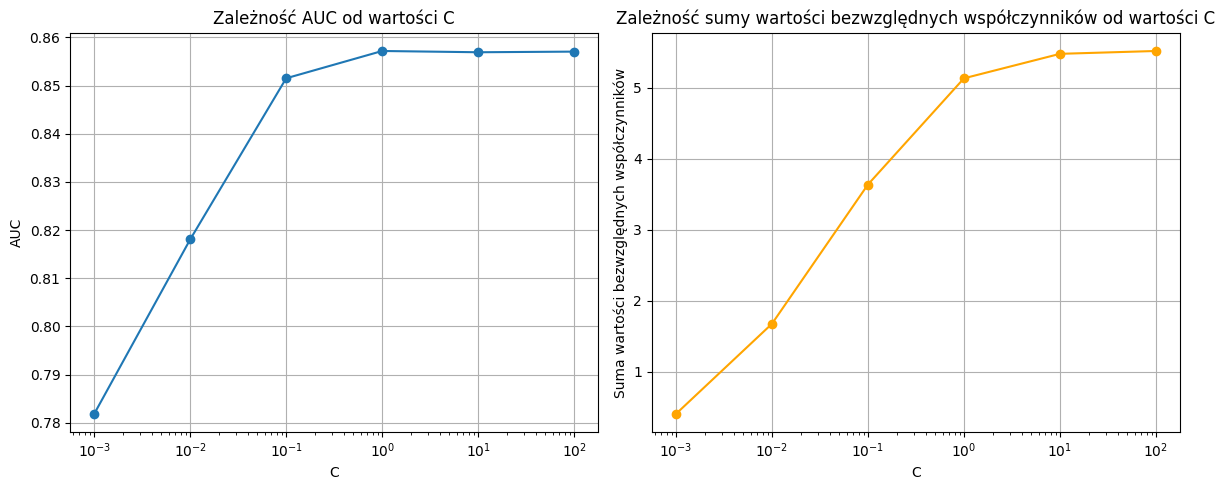

In [74]:
C_values = [0.001, 0.01, 0.1, 1, 10, 100]
auc_scores = []
abs_coeff_sums = []

for C in C_values:
    model = LogisticRegression(penalty='l2', C=C, solver='liblinear', random_state=28)
    model.fit(X_train, y_train)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)
    sum_abs_coeffs = np.sum(np.abs(model.coef_[0]))
    abs_coeff_sums.append(sum_abs_coeffs)

experiments_df = pd.DataFrame({'Wartość C': C_values,
                         'AUC': auc_scores,
                         'Suma wartości bezwzględnych współczynników': abs_coeff_sums})
print(experiments_df)
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(C_values, auc_scores, marker='o', linestyle='-')
plt.xscale('log')
plt.title('Zależność AUC od wartości C')
plt.xlabel('C')
plt.ylabel('AUC')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(C_values, abs_coeff_sums, marker='o', linestyle='-', color='orange')
plt.xscale('log')
plt.title('Zależność sumy wartości bezwzględnych współczynników od wartości C')
plt.xlabel('C')
plt.ylabel('Suma wartości bezwzględnych współczynników')
plt.grid(True)

plt.tight_layout()
plt.show()

## Zadanie 6.3
**Porównanie L1 vs L2:** Wytrenuj dwa modele z C=0.1:
* Model z regularyzacją L2 (Ridge): `penalty=’l2’`
* Model z regularyzacją L1 (Lasso): `penalty=’l1’, solver=’liblinear’`

Porównaj współczynniki obu modeli.

Porównanie współczynników modeli z regularyzacją L2 i L1 (C=0.1):
    Zmienna  Współczynnik (L2)  Współczynnik (L1)
4      fare           0.172254           0.054941
3     parch          -0.093351           0.000000
2     sibsp          -0.309922          -0.112354
1       age          -0.391590          -0.326787
5     alone          -0.419844           0.000000
0    pclass          -0.691663          -0.754779
6  sex_male          -1.854081          -1.992801


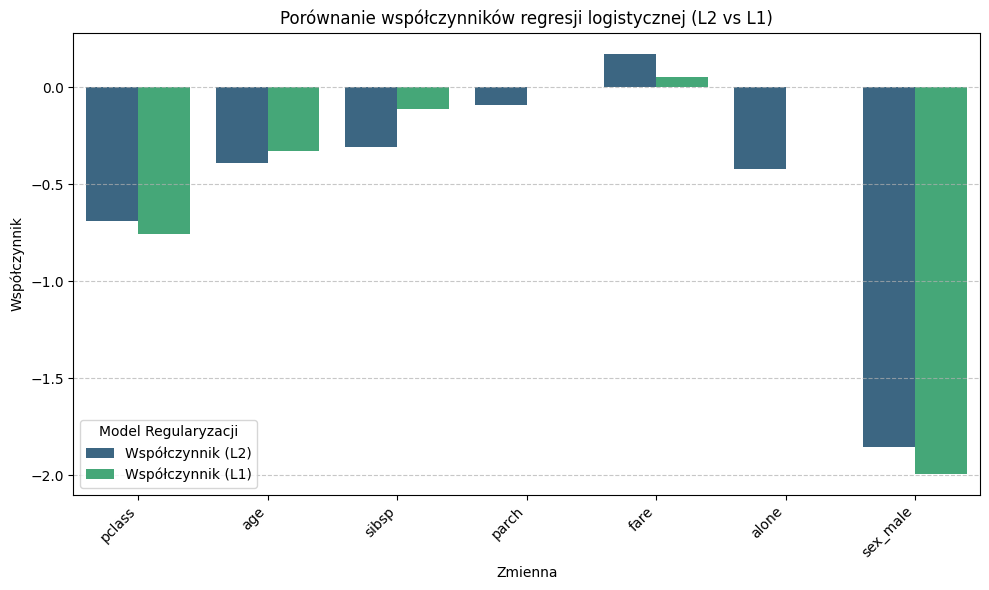

In [76]:
model_l2 = LogisticRegression(penalty='l2', C=0.1, random_state=35)
model_l2.fit(X_train, y_train)
model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear', random_state=35)
model_l1.fit(X_train, y_train)
coefficients_l2 = model_l2.coef_[0]
coefficients_l1 = model_l1.coef_[0]
feature_names = X_train.columns
coeff_comparison_df = pd.DataFrame({
    'Zmienna': feature_names,
    'Współczynnik (L2)': coefficients_l2,
    'Współczynnik (L1)': coefficients_l1
})
print("Porównanie współczynników modeli z regularyzacją L2 i L1 (C=0.1):")
print(coeff_comparison_df.sort_values(by='Współczynnik (L2)', ascending=False))
coeff_melted = coeff_comparison_df.melt(id_vars='Zmienna', var_name='Model Regularyzacji', value_name='Współczynnik')
plt.figure(figsize=(10, 6))
sns.barplot(x='Zmienna', y='Współczynnik', hue='Model Regularyzacji', data=coeff_melted, palette='viridis')
plt.title('Porównanie współczynników regresji logistycznej (L2 vs L1)')
plt.xlabel('Zmienna')
plt.ylabel('Współczynnik')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()